## Importing libraries

In [185]:
import sklearn 
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from mpl_toolkits import mplot3d
from sklearn.metrics import pairwise_distances_argmin
#you can use Python’s imaging library (PIL)
from PIL import Image
from IPython.display import display
# or you can use opencv ## conda install -c conda-forge opencv
# import cv2
import scipy.cluster.hierarchy as sch #you only for sch.dendrogram

# K Means clustering:

## Generate the synthetic dataset:

(300, 2)
(300, 1)


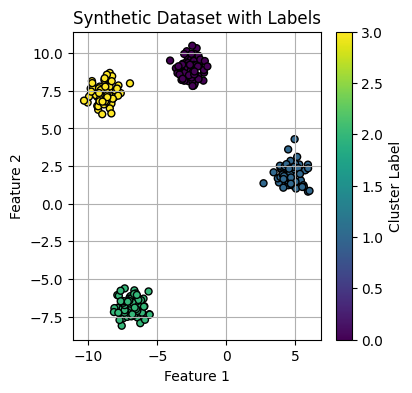

In [186]:
# Generate a synthetic dataset with 3 clusters and 2 features
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)
y = np.reshape(y, (-1, 1)) # reshape y to (300,1)
print(X.shape) # (300,2)
print(y.shape) # (300,1)

# Plot the data points
plt.figure(figsize=(4, 4))
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap='viridis', s=25, edgecolors='k')
plt.title('Synthetic Dataset with Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

## Regular K means with generated dataset:

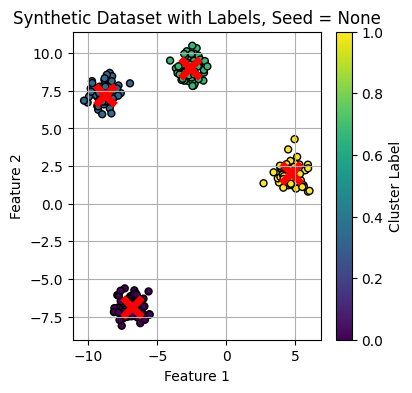

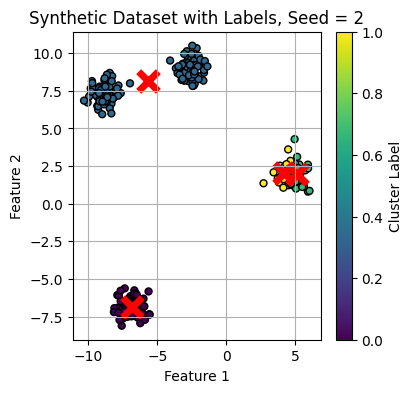

In [187]:
class k_means:
    def __init__(self, k, epochs, X, seed=None):
        self.X = X
        self.k = k
        self.epochs = epochs
        np.random.seed(seed)
        self.centroid_indices = np.random.choice(X.shape[0], k, replace=False)
        self.centroids = X[self.centroid_indices] # Initialize Centroids
 
    def fit(self):
        for i in range(self.epochs):
            labels = pairwise_distances_argmin(self.X, self.centroids) # get the labels for each row
            new_centroids = []
            for j in range(self.k): # Calculate the new centre for each centroid
                points = self.X[labels == j]
                new_centroid = np.mean(points, axis=0)
                new_centroids.append(new_centroid)
            self.centroids = np.array(new_centroids) # update centroids

        labels = pairwise_distances_argmin(self.X, self.centroids)
        return self.centroids, labels 

# K means without seed (default):
KMean_noseed = k_means(4, 1000, X)
centroids, labels = KMean_noseed.fit()

# K means with seed = 2
KMean = k_means(4, 1000, X, 2)
centroids_2, labels_2 = KMean.fit()

# Plot the data points
plt.figure(figsize=(4, 4))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=25, edgecolors='k')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=200, linewidths=5, label='Centroids') # Mark the centroids
plt.title('Synthetic Dataset with Labels, Seed = None')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

plt.figure(figsize=(4, 4))
plt.scatter(X[:, 0], X[:, 1], c=labels_2, cmap='viridis', s=25, edgecolors='k')
plt.scatter(centroids_2[:, 0], centroids_2[:, 1], marker='x', color='red', s=200, linewidths=5, label='Centroids') # Mark the centroids
plt.title('Synthetic Dataset with Labels, Seed = 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()



## K Means++ with generated dataset:

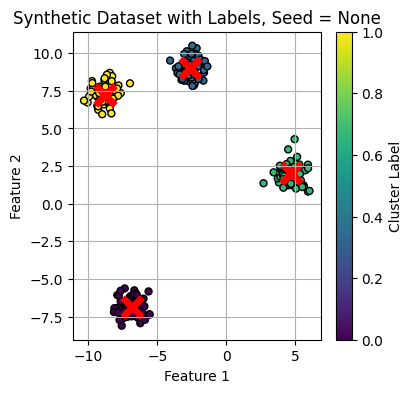

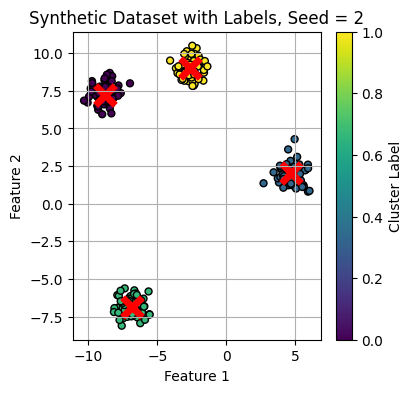

In [188]:
class k_means_pp:
    def __init__(self, k, epochs, X, seed=None):
        self.k = k
        self.epochs = epochs
        self.X = X
        self.seed = seed

    def gen_centroids(self):
        np.random.seed(self.seed)
        centroid_index = np.random.choice(X.shape[0], 1, replace=False) # Initialize one centroid
        centroids = self.X[centroid_index]

        while len(centroids) < self.k: # Generate the rest of the centroids
            distances = np.empty((len(self.X), len(centroids)))
            for i, centroid in enumerate(centroids):
                distances[:, i] = np.linalg.norm(self.X - centroid, axis=1)

            # Calculate minimum distance to the nearest centroid for each point
            min_distances = np.min(distances, axis=1)
            # Choose the next centroid as the point with the maximum minimum distance
            next_centroid_index = np.argmax(min_distances)
            next_centroid = self.X[next_centroid_index]
            centroids = np.append(centroids, [next_centroid], axis=0)

        return centroids

    def fit(self):
        centroids = self.gen_centroids() # Generate centroids based on kmeans++ algorithm and then run kmeans
        for i in range(self.epochs):
            labels = pairwise_distances_argmin(self.X, centroids) # get the labels for each row
            new_centroids = []
            for j in range(self.k): # Calculate the new centre for each centroid
                points = self.X[labels == j]
                new_centroid = np.mean(points, axis=0)
                new_centroids.append(new_centroid)
            centroids = np.array(new_centroids) # update centroids

        labels = pairwise_distances_argmin(self.X, centroids)
        return centroids, labels 

# K means++ without seed (default):
KMean_noseed = k_means_pp(4, 1000, X)
centroids, labels = KMean_noseed.fit()

# K means++ with seed = 2
KMean = k_means_pp(4, 1000, X, 2)
centroids_2, labels_2 = KMean.fit()

# Plot the data points
plt.figure(figsize=(4, 4))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=25, edgecolors='k')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=200, linewidths=5, label='Centroids') # Mark the centroids
plt.title('Synthetic Dataset with Labels, Seed = None')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

plt.figure(figsize=(4, 4))
plt.scatter(X[:, 0], X[:, 1], c=labels_2, cmap='viridis', s=25, edgecolors='k')
plt.scatter(centroids_2[:, 0], centroids_2[:, 1], marker='x', color='red', s=200, linewidths=5, label='Centroids') # Mark the centroids
plt.title('Synthetic Dataset with Labels, Seed = 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

## Comparing 4, 5, 7 and 8 with generated dataset:

Using the regular K means with the default seed (requirement 4) sometimes the random initial centroids were well generated so at times the k means clustering is accurate. However in other tries, the clustering is not very accurate due to badly generated random starting centroids. The centroids with random seed=2 always produced the same results, although the initial centers generated in this case is not the best either, so the clustering is not very accurate as seen in the graph.

For K means++, I consistently got accurate clustering results, regardless of whether I used a fixed random seed=2 or default. This is because we initialize the centroids in a smarter way in K means++ where each new centroid is furthest away from the last centroid. Therefore, the results from requirement 7 and 8 were consistently more accurate in comparison to regular K means (requirements 4 and 5).

## K Means with Image:

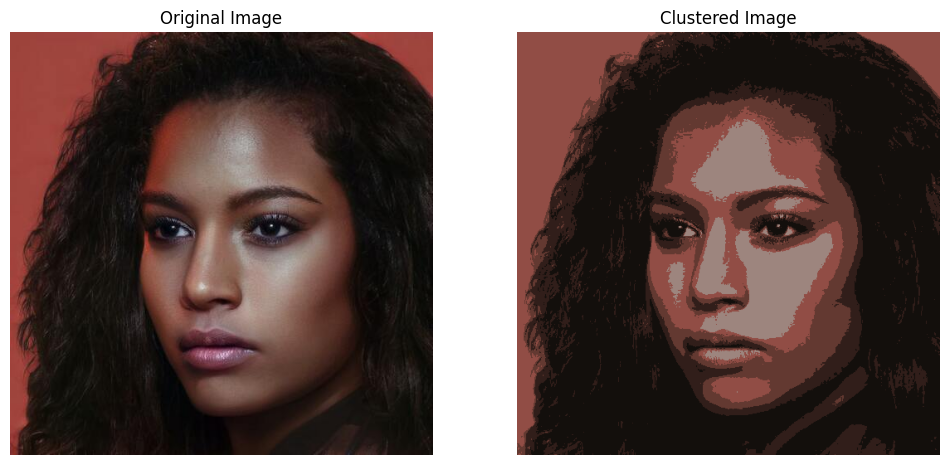

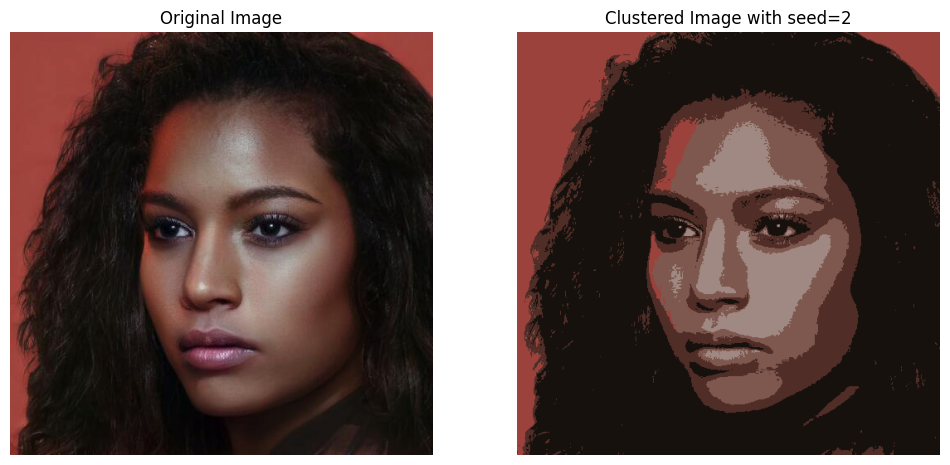

In [71]:
class k_means:
    def __init__(self, k, epochs, X, seed=None):
        self.X = X
        self.k = k
        self.epochs = epochs
        np.random.seed(seed)
        self.centroid_indices = np.random.choice(X.shape[0], k, replace=False)
        self.centroids = X[self.centroid_indices]

    def fit(self):
        for i in range(self.epochs):
            labels = pairwise_distances_argmin(self.X, self.centroids) # get the labels for each row
            new_centroids = []
            for j in range(self.k): # Calculate the new centre for each centroid
                points = self.X[labels == j]
                new_centroid = np.mean(points, axis=0)
                new_centroids.append(new_centroid)
            self.centroids = np.array(new_centroids) # update centroids

        # Assign each pixel to its cluster centroid's RGB value
        cluster_rgb = np.zeros_like(self.X)
        for j in range(self.k):
            cluster_rgb[labels == j] = self.centroids[j]

        return cluster_rgb

# Load the image and convert it to a NumPy array
image_path = "./cropped.jpg"  # Replace with the path to your image
image = Image.open(image_path)
image_array = np.array(image)

# Reshape the image array to have shape (num_pixels, 3) for RGB values
X = image_array.reshape(-1, 3)

# Initialize and fit the k-means algorithm
KMean = k_means(5, 300, X)
cluster_rgb = KMean.fit()

# Reshape the cluster RGB values back to the original image shape
cluster_image = cluster_rgb.reshape(image_array.shape)

# Display the original image and the clustered image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Clustered Image")
plt.imshow(cluster_image)
plt.axis('off')

plt.show()

# K means with seed=2:
KMean_2 = k_means(5, 300, X, 2)
cluster_rgb_2 = KMean_2.fit()

# Reshape the cluster RGB values back to the original image shape
cluster_image = cluster_rgb_2.reshape(image_array.shape)

# Display the original image and the clustered image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Clustered Image with seed=2")
plt.imshow(cluster_image_2)
plt.axis('off')

plt.show()


## K Means++ with Image:

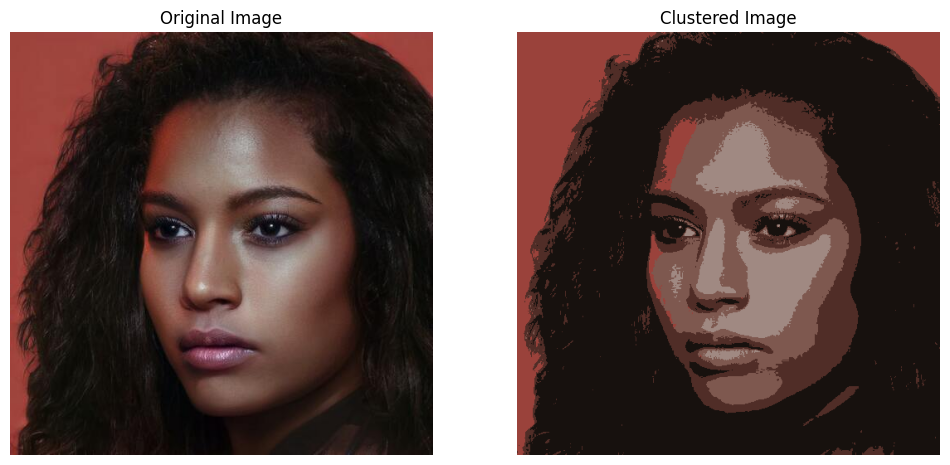

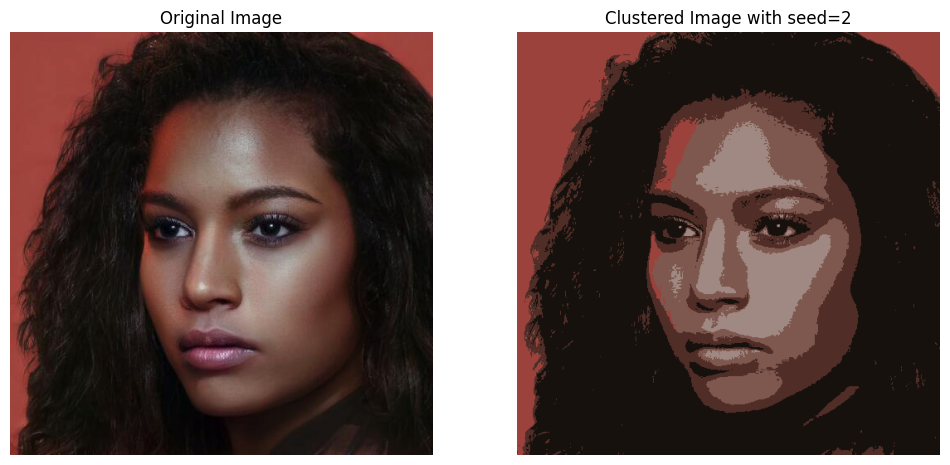

In [72]:
class k_means_pp:
    def __init__(self, k, epochs, X, seed=None):
        self.k = k
        self.epochs = epochs
        self.X = X
        self.seed = seed

    def gen_centroids(self):
        np.random.seed(self.seed)
        centroid_index = np.random.choice(X.shape[0], 1, replace=False)
        centroids = self.X[centroid_index]

        while len(centroids) < self.k:
            distances = np.empty((len(self.X), len(centroids)))
            for i, centroid in enumerate(centroids):
                distances[:, i] = np.linalg.norm(self.X - centroid, axis=1)

            # Calculate minimum distance to the nearest centroid for each point
            min_distances = np.min(distances, axis=1)
            # Choose the next centroid as the point with the maximum minimum distance
            next_centroid_index = np.argmax(min_distances)
            next_centroid = self.X[next_centroid_index]
            centroids = np.append(centroids, [next_centroid], axis=0)

        return centroids

    def fit(self):
        centroids = self.gen_centroids()
        for i in range(self.epochs):
            labels = pairwise_distances_argmin(self.X, centroids) # get the labels for each row
            new_centroids = []
            for j in range(self.k): # Calculate the new centre for each centroid
                points = self.X[labels == j]
                new_centroid = np.mean(points, axis=0)
                new_centroids.append(new_centroid)
            centroids = np.array(new_centroids) # update centroids

        # Assign each pixel to its cluster centroid's RGB value
        cluster_rgb = np.zeros_like(self.X)
        for j in range(self.k):
            cluster_rgb[labels == j] = centroids[j]

        return cluster_rgb


# Initialize and fit the k-means algorithm
KMean_pp = k_means_pp(5, 300, X)
cluster_rgb = KMean_pp.fit()

# Reshape the cluster RGB values back to the original image shape
cluster_image = cluster_rgb.reshape(image_array.shape)

# Display the original image and the clustered image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Clustered Image")
plt.imshow(cluster_image)
plt.axis('off')

plt.show()

# K means plus plus with seed=2:
KMean_pp_2 = k_means_pp(5, 300, X, 2)
cluster_rgb_2 = KMean_pp_2.fit()

# Reshape the cluster RGB values back to the original image shape
cluster_image_2 = cluster_rgb_2.reshape(image_array.shape)

# Display the original image and the clustered image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Clustered Image with seed=2")
plt.imshow(cluster_image_2)
plt.axis('off')

plt.show()

## Comparing results of requirements 4, 5, 7 and 8 with Image:

When comparing the image results, it was difficult to point out major differences in the results. The result of requirement 5 (K means with seed = 2) was very similar to the K means++ results (requirements 7 and 8) and they seem quite accurate in terms of clustering the colors according to the actual image. The image generated using regular K means and a random seed produced varying results depending on the initial centroids generated. As you can see, the image generated with regular K means and default seed has been clustered differently, and is less accurate since the red color is in places that it shouldn't be in.

# Hierarchical Clustering:

In [189]:
dataset = pd.read_csv('Mall_Customers.csv') # Load dataset
dataset['Gender'] = dataset['Gender'].replace({'Male': 0, 'Female': 1}) # Replace gender text data with numerical data
dataset.head

<bound method NDFrame.head of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1       0   19                  15                      39
1             2       0   21                  15                      81
2             3       1   20                  16                       6
3             4       1   23                  16                      77
4             5       1   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196       1   35                 120                      79
196         197       1   45                 126                      28
197         198       0   32                 126                      74
198         199       0   32                 137                      18
199         200       0   30                 137                      83

[200 rows x 5 columns]>

In [190]:

def get_ward_distance(A, B): 
    centroidA = np.mean(A[:, :], axis=0)  # Get the centroids for the cluster
    centroidB = np.mean(B[:, :], axis=0)  
    
    unionAB = np.vstack((A, B)) # Form a union cluster
    centroidAB = np.mean(unionAB[:, :], axis=0)  

    dist_squared_A = np.sum((A[:, :] - centroidA)**2, axis=1) # Calculate distance squared for each cluster
    sumA = np.sum(dist_squared_A)

    dist_squared_B = np.sum((B[:, :] - centroidB)**2, axis=1)
    sumB = np.sum(dist_squared_B)

    dist_squared_AB = np.sum((unionAB[:, :] - centroidAB)**2, axis=1)
    sumAB = np.sum(dist_squared_AB)

    ward_distance = np.sqrt(2 * (sumAB - sumA - sumB))

    return ward_distance

def hierarchical_clustering(dataset):
    top_index = len(dataset) - 1
    X = dataset.drop('CustomerID', axis=1)
    indices = np.arange(0, len(dataset - 1)) # Initialize an array for indices to keep track of IDs
    matrix = [] # Matrix for dendogram
    clusters = [np.array([row]) for row in X.values]  # Initialize clusters as a list of 2D arrays

    while len(clusters) > 1:
        min_distance = float('inf')
        index_A = None # indices of the two clusters that will be combined
        index_B = None
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                ward_distance = get_ward_distance(clusters[i], clusters[j])
                if ward_distance < min_distance:
                    min_distance = ward_distance
                    index_A = i
                    index_B = j
        
        unionAB = np.vstack((clusters[index_A], clusters[index_B])) # Combine the two clusters
        clusters.pop(index_B)
        clusters[index_A] = unionAB
        
        # Update indices
        matrix.append([indices[index_A], indices[index_B], min_distance, len(unionAB)]) # Update matrix for dendogram
        top_index += 1
        indices[index_A] = top_index
        indices = np.delete(indices, [index_B], axis=0)
        
    return matrix
    

In [191]:
# Perform hierarchical clustering
matrix = hierarchical_clustering(dataset)

# Convert matrix to numpy array
matrix = np.array(matrix)

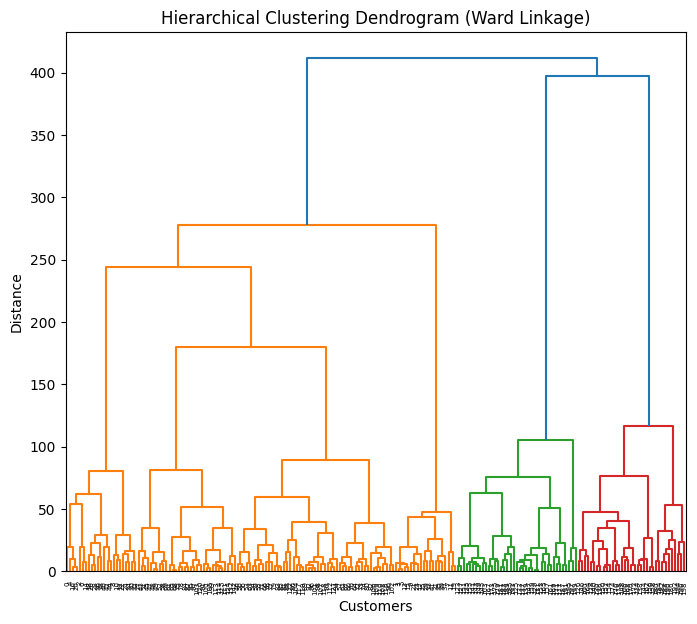

In [193]:
# Plot dendrogram
plt.figure(figsize=(8, 7))
den = sch.dendrogram(matrix)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()
